In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('data-midterm.csv',
                 header=0,delimiter=',',encoding='utf-8')
df

,TimeToPlay,TimeToStudy,ProfessionalScore,InterviewScore,Sexuality,ExpectedSalary,SocialNetworkingTimeUse,Result
0,0.1,4.4,2.5,F,T,249.6,Much,NO
1,4.1,5.7,3.7,D,L,114.6,Pretty,YES
2,7.3,0.9,2.7,D,T,862.0,Almost,NO
3,6.2,8.8,2.7,D,T,147.2,Almost,YES
4,5.0,3.1,0.2,D,Q,653.4,Pretty,NO
...,...,...,...,...,...,...,...,...
995,2.9,6.3,1.2,C,Q,512.1,Almost,YES
996,3.8,1.5,2.8,B,T,267.6,Almost,NO
997,7.4,0.6,1.3,D,Q,884.2,None,YES
998,8.5,5.7,3.3,C,L,662.2,Pretty,YES


In [4]:
df.shape

(1000, 8)

In [6]:
import statsmodels.api as sm
X_with_constant = sm.add_constant(df[["TimeToPlay", "TimeToStudy"]].values)
y = df[['ProfessionalScore']].values
result = sm.OLS(y, X_with_constant).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.253
Date:                Wed, 09 Oct 2024   Prob (F-statistic):              0.286
Time:                        18:26:55   Log-Likelihood:                -1550.3
No. Observations:                1000   AIC:                             3107.
Df Residuals:                     997   BIC:                             3121.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8134      0.096     18.860      0.0

In [42]:
#M3 = A0 + A1*M1 + A2*M2
print(1.8134 + 0.0188*7 + 0.006*5)

1.9749999999999999


In [8]:
d = df['InterviewScore'].value_counts()

d.idxmax()

'D'

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols



model = ols('ProfessionalScore ~ Sexuality', data=df).fit()

aov_table = sm.stats.anova_lm(model, typ=1)

print(aov_table)


              df       sum_sq   mean_sq         F    PR(>F)
Sexuality    4.0     2.501237  0.625309  0.478149  0.751816
Residual   995.0  1301.232673  1.307772       NaN       NaN


In [14]:
bins = [0, 5, 7, 9, np.inf]
labels = ['Bad', 'Pretty', 'Good', 'Excellent']

# Phân loại dữ liệu theo các khoảng
df['Rating'] = pd.cut(df['TimeToStudy'], bins=bins, labels=labels, right=False)

# Đếm số phần tử thuộc nhóm nhãn 'Good'
count_good = df[df['Rating'] == 'Good'].shape[0]

print(f"Số phần tử thuộc nhóm nhãn 'Good': {count_good}")

Số phần tử thuộc nhóm nhãn 'Good': 201


In [15]:
df

,TimeToPlay,TimeToStudy,ProfessionalScore,InterviewScore,Sexuality,ExpectedSalary,SocialNetworkingTimeUse,Result,Rating
0,0.1,4.4,2.5,F,T,249.6,Much,NO,Bad
1,4.1,5.7,3.7,D,L,114.6,Pretty,YES,Pretty
2,7.3,0.9,2.7,D,T,862.0,Almost,NO,Bad
3,6.2,8.8,2.7,D,T,147.2,Almost,YES,Good
4,5.0,3.1,0.2,D,Q,653.4,Pretty,NO,Bad
...,...,...,...,...,...,...,...,...,...
995,2.9,6.3,1.2,C,Q,512.1,Almost,YES,Pretty
996,3.8,1.5,2.8,B,T,267.6,Almost,NO,Bad
997,7.4,0.6,1.3,D,Q,884.2,None,YES,Bad
998,8.5,5.7,3.3,C,L,662.2,Pretty,YES,Pretty


In [16]:
X_with_constant = sm.add_constant(df[["TimeToPlay", "TimeToStudy"]].values)
y = df[['ProfessionalScore']].values
result = sm.OLS(y, X_with_constant).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.253
Date:                Wed, 09 Oct 2024   Prob (F-statistic):              0.286
Time:                        18:42:41   Log-Likelihood:                -1550.3
No. Observations:                1000   AIC:                             3107.
Df Residuals:                     997   BIC:                             3121.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8134      0.096     18.860      0.0

In [19]:
tb = df['ProfessionalScore'].mean()
hypothesized_mean = 2.4575
from scipy import stats
# Thực hiện t-test cho một mẫu
t_statistic, p_value = stats.ttest_1samp(tb, hypothesized_mean)

# In kết quả
print(f"T-statistic: {t_statistic}, P-value: {p_value}")

# Kiểm tra kết quả
alpha = 0.05  # Mức ý nghĩa
if p_value < alpha:
    print("Bác bỏ giả thuyết không: Có đủ dữ kiện để nói rằng trung bình điểm đánh giá năng lực không phải là 2.4575.")
else:
    print("Không bác bỏ giả thuyết không: Có đủ dữ kiện để nói rằng trung bình điểm đánh giá năng lực là 2.4575.")

T-statistic: nan, P-value: nan
Không bác bỏ giả thuyết không: Có đủ dữ kiện để nói rằng trung bình điểm đánh giá năng lực là 2.4575.


c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [20]:
from statsmodels.stats.weightstats import ztest as ztest
ztest(tb, value=2.4575)

IndexError: tuple index out of range

In [21]:
filtered_df = df[(df['Sexuality'] == 'T') & (df['InterviewScore'] == 'B')]

# Tính toán TimeToPlay và TimeToStudy
time_to_play = filtered_df['TimeToPlay']
time_to_study = filtered_df['TimeToStudy']

# Thực hiện t-test cho hai mẫu độc lập
t_statistic, p_value = stats.ttest_ind(time_to_play, time_to_study)

# In kết quả
print(f"T-statistic: {t_statistic}, P-value: {p_value}")

# Kiểm tra kết quả
alpha = 0.05  # Mức sai lầm 5%
if p_value < alpha:
    print("Bác bỏ giả thuyết không: Trung bình TimeToPlay và TimeToStudy không bằng nhau.")
else:
    print("Không bác bỏ giả thuyết không: Trung bình TimeToPlay và TimeToStudy có thể bằng nhau.")

T-statistic: -0.8066329122653516, P-value: 0.42667670534192237
Không bác bỏ giả thuyết không: Trung bình TimeToPlay và TimeToStudy có thể bằng nhau.


In [43]:
from scipy.stats.stats import pearsonr
pearsonr(time_to_play, time_to_study )

(0.6378230813899906, 0.010519907777518564)

In [22]:
Q1 = df['ProfessionalScore'].quantile(0.25)
Q3 = df['ProfessionalScore'].quantile(0.75)
IQR = Q3 - Q1

# Xác định giới hạn dưới và giới hạn trên
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Tìm các điểm dữ liệu bất thường
outliers = df[(df['ProfessionalScore'] < lower_bound) | (df['ProfessionalScore'] > upper_bound)]

# In kết quả
print(f"Giới hạn dưới: {lower_bound}")
print(f"Giới hạn trên: {upper_bound}")
print(f"Số điểm bất thường: {outliers.shape[0]}")
print(outliers)

Giới hạn dưới: -1.8499999999999996
Giới hạn trên: 5.75
Số điểm bất thường: 0
Empty DataFrame
Columns: [TimeToPlay, TimeToStudy, ProfessionalScore, InterviewScore, Sexuality, ExpectedSalary, SocialNetworkingTimeUse, Result, Rating]
Index: []


In [23]:
min_value = df['TimeToStudy'].min()
max_value = df['TimeToStudy'].max()

# Số lượng bin
num_bins = 20

# Tính độ lớn của mỗi bin
bin_width = (max_value - min_value) / num_bins

# In kết quả
print(f"Giá trị nhỏ nhất: {min_value}")
print(f"Giá trị lớn nhất: {max_value}")
print(f"Độ lớn của mỗi bin: {bin_width}")

Giá trị nhỏ nhất: 0.0
Giá trị lớn nhất: 10.0
Độ lớn của mỗi bin: 0.5


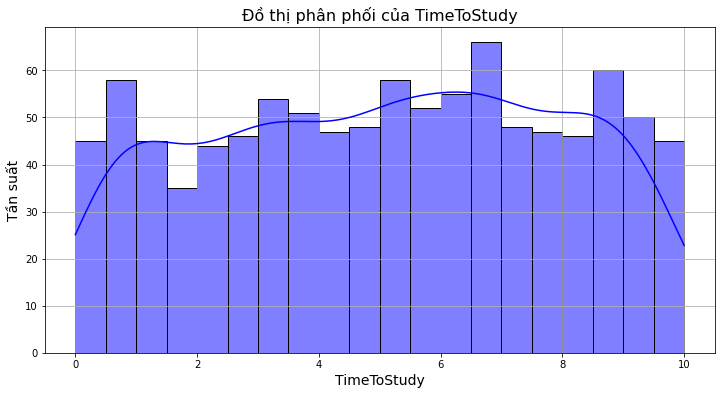

In [24]:
plt.figure(figsize=(12, 6))
sns.histplot(df['TimeToStudy'], bins=20, kde=True, color='blue')

# Thêm tiêu đề và nhãn
plt.title('Đồ thị phân phối của TimeToStudy', fontsize=16)
plt.xlabel('TimeToStudy', fontsize=14)
plt.ylabel('Tần suất', fontsize=14)

# Hiển thị đồ thị
plt.grid()
plt.show()

In [34]:
# Các khoảng phân vị và nhãn tương ứng
bins = [0, 0.2, 0.5, 0.6, 0.8, 1]
labels = ['A', 'B', 'C', 'D', 'E']
# Tạo cột nhãn cho ProfessionalScore
df['Score_Category'] = pd.cut(df['ProfessionalScore'], bins=bins, labels=labels, right=True)

# Kiểm tra giá trị ProfessionalScore = 2.7
value_to_check = 2.7
category = None

df

,TimeToPlay,TimeToStudy,ProfessionalScore,InterviewScore,Sexuality,ExpectedSalary,SocialNetworkingTimeUse,Result,Rating,Score_Category,Normalized_ProfessionalScore
0,0.1,4.4,2.5,F,T,249.6,Much,NO,Bad,NaN,0.625
1,4.1,5.7,3.7,D,L,114.6,Pretty,YES,Pretty,NaN,0.925
2,7.3,0.9,2.7,D,T,862.0,Almost,NO,Bad,NaN,0.675
3,6.2,8.8,2.7,D,T,147.2,Almost,YES,Good,NaN,0.675
4,5.0,3.1,0.2,D,Q,653.4,Pretty,NO,Bad,A,0.050
...,...,...,...,...,...,...,...,...,...,...,...
995,2.9,6.3,1.2,C,Q,512.1,Almost,YES,Pretty,NaN,0.300
996,3.8,1.5,2.8,B,T,267.6,Almost,NO,Bad,NaN,0.700
997,7.4,0.6,1.3,D,Q,884.2,None,YES,Bad,NaN,0.325
998,8.5,5.7,3.3,C,L,662.2,Pretty,YES,Pretty,NaN,0.825


In [33]:
# Chuẩn hóa cột ProfessionalScore về khoảng [0, 1]
min_score = df['ProfessionalScore'].min()
max_score = df['ProfessionalScore'].max()

df['Normalized_ProfessionalScore'] = (df['ProfessionalScore'] - min_score) / (max_score - min_score)

In [35]:
# Các khoảng phân vị và nhãn tương ứng
bins = [0, 0.2, 0.5, 0.6, 0.8, 1]
labels = ['A', 'B', 'C', 'D', 'E']
# Tạo cột nhãn cho ProfessionalScore
df['Score_Categoryaaa'] = pd.cut(df['Normalized_ProfessionalScore'], bins=bins, labels=labels, right=True)

# Kiểm tra giá trị ProfessionalScore = 2.7
value_to_check = 2.7
category = None

In [36]:
df

,TimeToPlay,TimeToStudy,ProfessionalScore,InterviewScore,Sexuality,ExpectedSalary,SocialNetworkingTimeUse,Result,Rating,Score_Category,Normalized_ProfessionalScore,Score_Categoryaaa
0,0.1,4.4,2.5,F,T,249.6,Much,NO,Bad,NaN,0.625,D
1,4.1,5.7,3.7,D,L,114.6,Pretty,YES,Pretty,NaN,0.925,E
2,7.3,0.9,2.7,D,T,862.0,Almost,NO,Bad,NaN,0.675,D
3,6.2,8.8,2.7,D,T,147.2,Almost,YES,Good,NaN,0.675,D
4,5.0,3.1,0.2,D,Q,653.4,Pretty,NO,Bad,A,0.050,A
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.9,6.3,1.2,C,Q,512.1,Almost,YES,Pretty,NaN,0.300,B
996,3.8,1.5,2.8,B,T,267.6,Almost,NO,Bad,NaN,0.700,D
997,7.4,0.6,1.3,D,Q,884.2,None,YES,Bad,NaN,0.325,B
998,8.5,5.7,3.3,C,L,662.2,Pretty,YES,Pretty,NaN,0.825,E


In [37]:
# Calculate the 75th percentile of ProfessionalScore
percentile_75 = np.percentile(df['ProfessionalScore'].dropna(), 75)

print(f"25% of students have a professional score higher than {percentile_75:.2f}")

25% of students have a professional score higher than 2.90


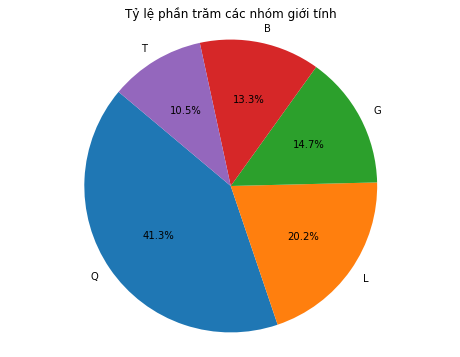

Q    41.3
L    20.2
G    14.7
B    13.3
T    10.5
Name: Sexuality, dtype: float64


In [38]:
# Tính tỷ lệ phần trăm các nhóm giới tính
gender_counts = df['Sexuality'].value_counts(normalize=True) * 100

# Vẽ biểu đồ Pie
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Tỷ lệ phần trăm các nhóm giới tính')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

# In kết quả tỷ lệ phần trăm
print(gender_counts)

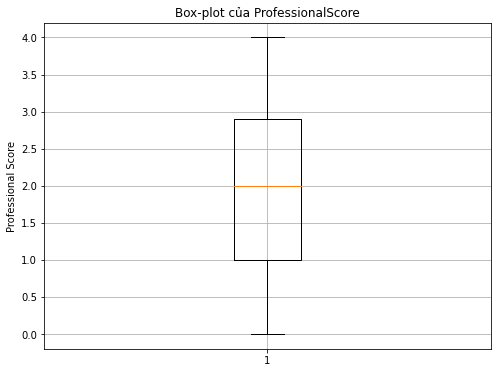

Số lượng giá trị bất thường: 0


In [39]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['ProfessionalScore'])
plt.title('Box-plot của ProfessionalScore')
plt.ylabel('Professional Score')
plt.grid()
plt.show()

# Kiểm tra giá trị bất thường
Q1 = df['ProfessionalScore'].quantile(0.25)
Q3 = df['ProfessionalScore'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['ProfessionalScore'] < lower_bound) | (df['ProfessionalScore'] > upper_bound)]
num_outliers = outliers.shape[0]

print(f'Số lượng giá trị bất thường: {num_outliers}')

In [40]:
# Tính trung bình điểm đánh giá năng lực của tất cả sinh viên
overall_mean = df['ProfessionalScore'].mean()

# Nhóm theo xu hướng tính dục và tính trung bình điểm đánh giá năng lực
mean_scores_by_sexuality = df.groupby('Sexuality')['ProfessionalScore'].mean()

# Tìm các nhóm có điểm đánh giá năng lực lớn hơn trung bình
higher_than_average = mean_scores_by_sexuality[mean_scores_by_sexuality > overall_mean]

# In kết quả
print("Những nhóm xu hướng tính dục có điểm đánh giá năng lực lớn hơn trung bình:")
print(higher_than_average)

Những nhóm xu hướng tính dục có điểm đánh giá năng lực lớn hơn trung bình:
Sexuality
B    2.025564
Q    1.960533
Name: ProfessionalScore, dtype: float64


In [41]:

# Tạo bảng Crosstab
crosstab = pd.crosstab(df['Sexuality'], df['InterviewScore'])

# Tìm giá trị nhỏ nhất trong bảng Crosstab và nhóm tương ứng
min_value = crosstab.min().min()  # Giá trị nhỏ nhất trong bảng
min_group = crosstab.stack().idxmin()  # Nhóm tương ứng với giá trị nhỏ nhất

# In kết quả
print("Giá trị nhỏ nhất trong bảng Crosstab là:", min_value)
print("Giá trị nhỏ nhất thuộc nhóm:", min_group)

Giá trị nhỏ nhất trong bảng Crosstab là: 5
Giá trị nhỏ nhất thuộc nhóm: ('B', 'A')
